In [1]:
import pandas as pd
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prepe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("new_dataset.csv", encoding="latin-1")

In [3]:
data = data[["subject", "body", "class"]]

In [4]:
data.drop(['subject'], axis=1, inplace=True)

In [5]:
data.head()

,body,class
0,"oo thank you , your email address was obtained...",spam
1,revolutionary ! ! ! full featured ! ! ! space ...,spam
2,"greetings , i am benedicta lindiwe hendricks (...",spam
3,eliminate your credit card debt without bankru...,spam
4,carolyn regretful watchfully procrustes godly ...,spam


In [6]:
data.isna().sum()

body     370
class    163
dtype: int64

In [7]:
data = data.dropna().reset_index(drop=True)

In [8]:
data.isna().sum()

body     0
class    0
dtype: int64

In [9]:
data

,body,class
0,"oo thank you , your email address was obtained...",spam
1,revolutionary ! ! ! full featured ! ! ! space ...,spam
2,"greetings , i am benedicta lindiwe hendricks (...",spam
3,eliminate your credit card debt without bankru...,spam
4,carolyn regretful watchfully procrustes godly ...,spam
...,...,...
33311,"fyi , kim . - - - - - original message - - - -...",ham
33312,start date : 2 / 7 / 02 ; hourahead hour : 1 ;...,ham
33313,"fyi , kim . - - - - - original message - - - -...",ham
33314,start date : 2 / 6 / 02 ; hourahead hour : 24 ...,ham


In [10]:
data["body"][0]

'oo thank you , your email address was obtained from a purchased list , reference # 2020 mid = 3300 . if you wish to unsubscribe from this list , please click here and enter your name into the remove box . if you have previously unsubscribed and are still receiving this message , you may email our abuse control center , or call 1 - 888 - 763 - 2497 , or write us at : nospam , 6484 coral way , miami , fl , 33155 " . Â© 2002 web credit inc . all rights reserved .'

In [11]:
import re

corpus = []
length = len(data)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",data["body"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)

In [12]:
print(text)

fyi kim origin messag frazier perri sent thursday march 07 2002 2 25 pm lebeau randi watson kimberli abdmoulai mansoor subject ivanho e coupl addit thought cost estim esd mod 130 000 typic 25 e abdmoulai mansoor frazier perri subject fw ivanho e estim upgrad ivanho esd system pleas keep mind hp locat oper sever year ever requir may look major expens 200 000 origin messag jordan fred sent thursday march 07 2002 7 24 lebeau randi subject ivanho e fyi forward fred jordan et enron 03 07 2002 07 10 eddi pool 03 07 2002 07 13 fred jordan et enron enron cc subject ivanho e fred came ivanho station


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)

X = cv.fit_transform(corpus).toarray()

In [14]:
y=data['class']


In [15]:
len(X)

33316

In [16]:
len(y)

33316

In [17]:
y

0        spam
1        spam
2        spam
3        spam
4        spam
         ... 
33311     ham
33312     ham
33313     ham
33314     ham
33315     ham
Name: class, Length: 33316, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred=model.predict(X_test)

In [21]:
y_pred = list(map(lambda pred: 1 if pred=="spam" else 0, y_pred))

In [22]:
y_test = list(map(lambda test: 1 if test=="spam" else 0, y_test))

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(recall)
print(precision)
print(accuracy)
print(cm)

0.9408955223880597
0.9807093963907902
0.960984393757503
[[3252   62]
 [ 198 3152]]


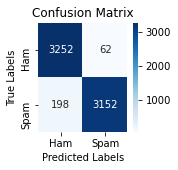

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['Ham', 'Spam']

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

plt.savefig("confusion_matrix.png", dpi=300)

In [28]:
r_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test)

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
r_auc = roc_auc_score(y_test, r_probs)
model_probs = roc_auc_score(y_test, model_probs)

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
import joblib
joblib.dump(cv, "cv.joblib")
joblib.dump(model, "new_nb_model.joblib")

In [ ]:
# Now testing on new data

In [ ]:
def preprocess(input_email):
    input_email = re.sub('[^a-zA-Z]', ' ', input_email)
    input_email.lower()
    input_email = input_email.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    input_email = [ps.stem(word) for word in input_email if not word in set(all_stopwords)]
    input_email = ' '.join(input_email)
    new_corpus = [input_email]
    new_X_test = cv.transform(new_corpus).toarray()
    
    return new_X_test

In [ ]:
# Spam email sample from dataset

input_email = """oo thank you , your email address was obtained from a purchased list , reference # 2020 mid = 3300 . if you wish to unsubscribe from this list , please click here and enter your name into the remove box . if you have previously unsubscribed and are still receiving this message , you may email our abuse control center , or call 1 - 888 - 763 - 2497 , or write us at : nospam , 6484 coral way , miami , fl , 33155 " . Â© 2002 web credit inc . all rights reserved ."""

In [ ]:
new_X_test = preprocess(input_email)
new_y_pred = model.predict(new_X_test)
print(new_y_pred[0])

In [ ]:
# Ham email sample from dataset

input_email = """hi vince , thanks for taking the time off to meet with me last week . i did enjoy meeting you and your co - workers in the research group . i do realize my background may not be the best fit for the type of work done in your division . i ' ll be job hunting over the next several weeks , and would really appreciate it if you could let let me know if something opens up at enron . thanks again and best regards . ruwan - - * ruwan jayasuriya economics department ruwan @ rice . edu rice university http : / / www . ruf . rice . edu / ~ ruwan houston , tx 77005 *"""

In [ ]:
new_X_test = preprocess(input_email)
new_y_pred = model.predict(new_X_test)
print(new_y_pred[0])

In [ ]:
from win32com.client import Dispatch
import tkinter as tk

def speak(text):
    speak=Dispatch(("SAPI.SpVoice"))
    speak.Speak(text)
    
def result():
    test_email = [text.get()]    
    test_email = preprocess(test_email[0])
    pred = model.predict(test_email)
    
    if pred[0]=='spam':
        speak("This is a Spam email")
        print("This is a Spam email")
    else:
        speak("This is not a Spam email")
        print("This is not a Spam email")

In [ ]:
root=tk.Tk()
root.geometry("200x200")
l2=tk.Label(root, text="Email Spam Classification Application")
l2.pack()
l1=tk.Label(root, text="Enter Your Message:")
l1.pack()
text=tk.Entry(root)
text.pack()

B=tk.Button(root, text="Click", command=result)
B.pack()

root.mainloop()